In [1]:
import Hokusai
import PyPlot
using DataFrames

In [8]:
function getCrispness(P, pi, k, ratematrix)
    # schurfactorization
    X, λ = Hokusai.schurvectors(P, pi, k, ratematrix)
    #println(X'*diagm(pi)*X)
    # objective function
    obj = A -> Hokusai.I3(A)
    # compute A via prechosen fct obj
    A = Hokusai.guessinit(X)
    A = Hokusai.opt(A, X, obj)
    return(Hokusai.I3(A)/k)
end


function getNumberOfClusters(image, tau, person, kmin, kmax, sigmin, sigmax)
    symmetrize = false #reversible MC?
    ratematrix = false #select highest/lowest eigenvalue
    # filter and prepare data
    data = Hokusai.filterdata(Hokusai.DATA, image, 0, 52)
    ts = Hokusai.TimeSeries(data)
    timeseries = person == 0 ? ts : ts[person]

    # get transition matrix
    grid = Hokusai.points(timeseries);
    
    otmTotal = DataFrame(noCluster = Int[], crispness = Float64[], sigma = Int[])
    
    for sigma = sigmin:sigmax
        sigma = sigma*10
        
        P = Hokusai.transitionmatrix(timeseries, sigma, tau, grid, symmetrize);
        # get stationary distribution
        pi = Hokusai.stationaryDistr(P, ratematrix)
        # objective to maximize
        otm = DataFrame(noCluster = Int[], crispness = Float64[], sigma = Int[])
        for k = kmin:kmax
            crispness = try getCrispness(P, pi, k, ratematrix) catch 0 end
            # trace(S)/k
            push!(otm,[k, crispness, sigma])
        end
        #println(string("sigma ",sigma))
        otmTotal = [otmTotal; otm]
    end
    return(otmTotal)
end

getNumberOfClusters (generic function with 1 method)

In [3]:
# variables/parameters
#img = 1
tau = 40
kmin = 4
kmax = 20
sigmin = 4
sigmax = 12
person = 4

a1 = getNumberOfClusters(1, tau, person, kmin, kmax, sigmin, sigmax)
a2 = getNumberOfClusters(2, tau, person, kmin, kmax, sigmin, sigmax)
a3 = getNumberOfClusters(3, tau, person, kmin, kmax, sigmin, sigmax)
a4 = getNumberOfClusters(4, tau, person, kmin, kmax, sigmin, sigmax)
a5 = getNumberOfClusters(5, tau, person, kmin, kmax, sigmin, sigmax)
a6 = getNumberOfClusters(6, tau, person, kmin, kmax, sigmin, sigmax)
a7 = getNumberOfClusters(7, tau, person, kmin, kmax, sigmin, sigmax)
a8 = getNumberOfClusters(8, tau, person, kmin, kmax, sigmin, sigmax)

sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120
sigma 40
sigma 50
sigma 60
sigma 70
sigma 80
sigma 90
sigma 100
sigma 110
sigma 120


,noCluster,crispness,sigma
1,4,0.428858,40
2,5,0.491392,40
3,6,0.33834,40
4,7,0.418573,40
5,8,0.534596,40
6,9,0.845505,40
7,10,0.919126,40
8,11,0.644108,40
9,12,1.0,40
10,13,0.0,40


In [7]:
#println(a)
max, ind = findmax(a1[:crispness])
println(a1[ind,:])

max, ind = findmax(a2[:crispness])
println(a2[ind,:])

max, ind = findmax(a3[:crispness])
println(a3[ind,:])

max, ind = findmax(a4[:crispness])
println(a4[ind,:])

max, ind = findmax(a5[:crispness])
println(a5[ind,:])

max, ind = findmax(a6[:crispness])
println(a6[ind,:])

max, ind = findmax(a7[:crispness])
println(a7[ind,:])

max, ind = findmax(a8[:crispness])
println(a8[ind,:])

1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 4         │ 0.860487  │ 110   │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 13        │ 1.0       │ 120   │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 6         │ 0.704725  │ 40    │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness  │ sigma │
├─────┼───────────┼────────────┼───────┤
│ 1   │ 4         │ 2.22178e17 │ 40    │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 10        │ 18850.1   │ 40    │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 6         │ 0.774737  │ 60    │
1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 4         │ 0.

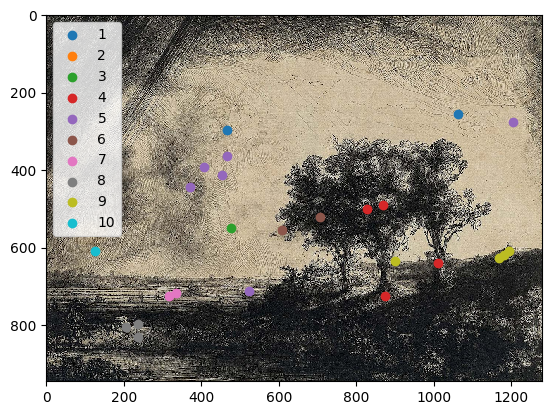

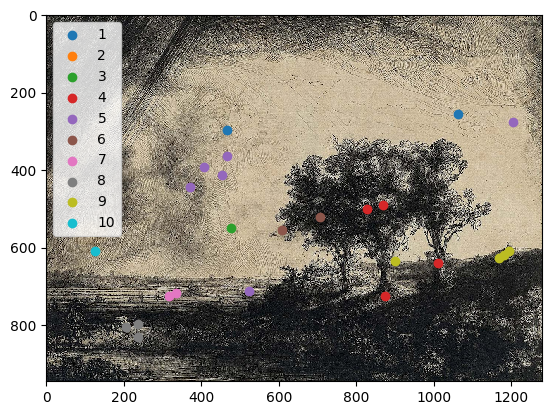

In [5]:
img = 8
n = 10
sigma = 40
tau = 40
person = 4
mirrored = 0
startPos = 52

Hokusai.run(img, n, sigma, tau, person, mirrored, startPos)

In [14]:
img = 8
tau = 40
kmin = 4
kmax = 20
sigmin = 4
sigmax = 12
person = 0
a = getNumberOfClusters(img, tau, person, kmin, kmax, sigmin, sigmax)
a[a[:noCluster] .== 4,:]

,noCluster,crispness,sigma
1,4,0.407137,40
2,4,0.465299,50
3,4,0.521326,60
4,4,0.483918,70
5,4,0.540068,80
6,4,0.59252,90
7,4,0.615421,100
8,4,0.630742,110
9,4,0.631768,120


In [18]:
max, ind = findmax(a[:crispness])
println(a[ind,:])
a[a[:noCluster] .== 8,:]

1×3 DataFrames.DataFrame
│ Row │ noCluster │ crispness │ sigma │
├─────┼───────────┼───────────┼───────┤
│ 1   │ 4         │ 0.631768  │ 120   │


,noCluster,crispness,sigma
1,8,0.250448,40
2,8,0.348772,50
3,8,0.365591,60
4,8,0.344305,70
5,8,0.381538,80
6,8,0.39627,90
7,8,0.39503,100
8,8,0.371223,110
9,8,0.263371,120


scaling
image 1
[3.0, 0.592115]
[4.0, 0.539323]
[5.0, 0.467007]
[6.0, 0.554412]
[7.0, 0.370495]
[8.0, 0.347622]
[9.0, 0.237864]
[10.0, 0.204283]
best number of clusters: 3.0
image 2
[3.0, 0.530361]
[4.0, 0.54953]
[5.0, 0.455918]
[6.0, 0.366096]
[7.0, 0.337778]
[8.0, 0.269739]
[9.0, 0.317194]
[10.0, 0.2784]
best number of clusters: 4.0
image 3
[3.0, 0.46389]
[4.0, 0.456254]
[5.0, 0.327201]
[6.0, 0.286247]
[7.0, 0.304498]
[8.0, 0.305236]
[9.0, 0.386187]
[10.0, 0.298254]
best number of clusters: 3.0
image 4
[3.0, 0.542937]
[4.0, 0.497035]
[5.0, 0.363099]
[6.0, 0.394205]
[7.0, 0.404731]
[8.0, 0.343539]
[9.0, 0.36018]
[10.0, 0.311275]
best number of clusters: 3.0
image 5
[3.0, 0.448845]
[4.0, 0.431526]
[5.0, 0.368433]
[6.0, 0.415233]
[7.0, 0.329885]
[8.0, 0.287479]
[9.0, 0.236657]
[10.0, 0.222335]
best number of clusters: 3.0
image 6
[3.0, 0.482015]
[4.0, 0.462809]
[5.0, 0.349048]
[6.0, 0.442289]
[7.0, 0.313953]
[8.0, 0.337918]
[9.0, 0.260703]
[10.0, 0.221591]
best number of clusters: 3.0
i

/home/lara/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[3.0, 0.508911]
[4.0, 0.471882]
[5.0, 0.372064]
[6.0, 0.42326]
[7.0, 0.330027]
[8.0, 0.357334]
[9.0, 0.273973]
[10.0, 0.230051]
best number of clusters: 3.0
image 7
[3.0, 0.560821]
[4.0, 0.468698]
[5.0, 0.55105]
[6.0, 0.43982]
[7.0, 0.428085]
[8.0, 0.360896]
[9.0, 0.305705]
[10.0, 0.261912]
best number of clusters: 3.0
image 8
[3.0, 0.499378]
[4.0, 0.461879]
[5.0, 0.392329]
[6.0, 0.397866]
[7.0, 0.37725]
[8.0, 0.342456]
[9.0, 0.271976]


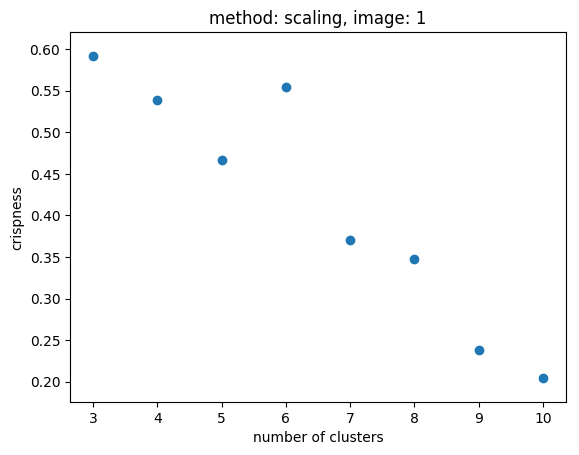

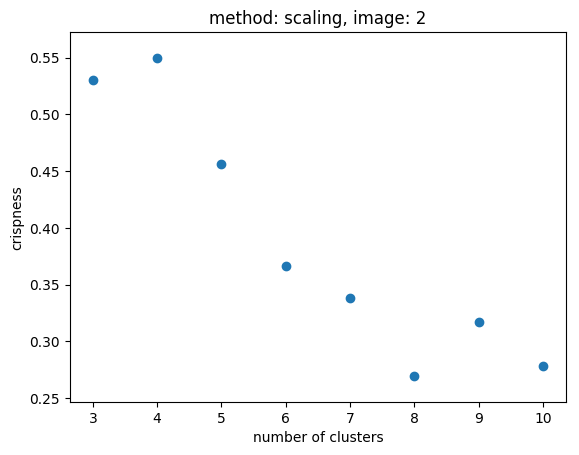

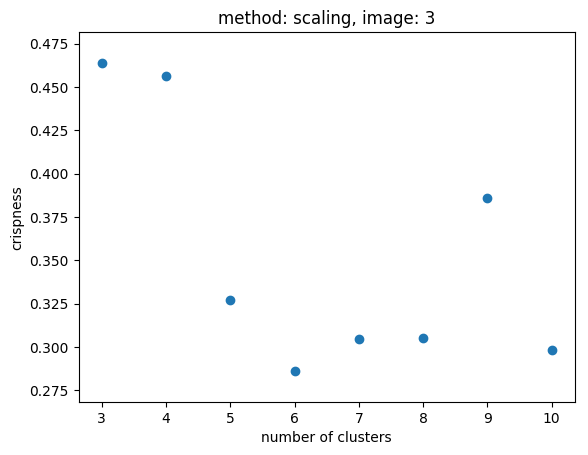

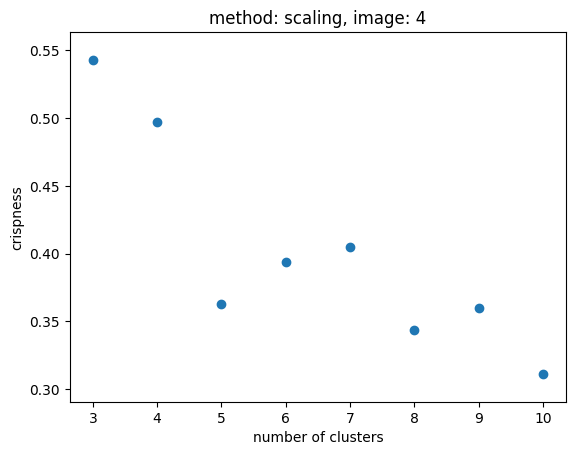

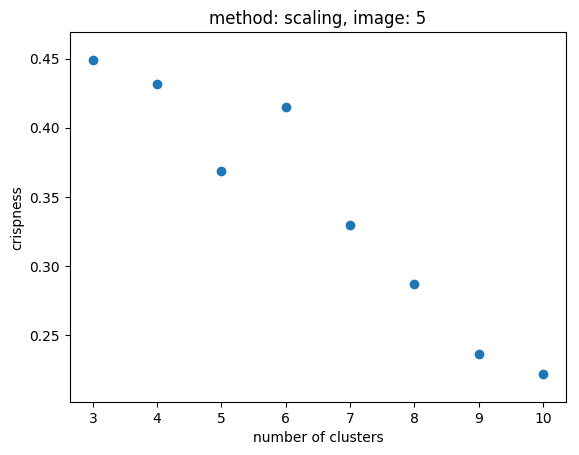

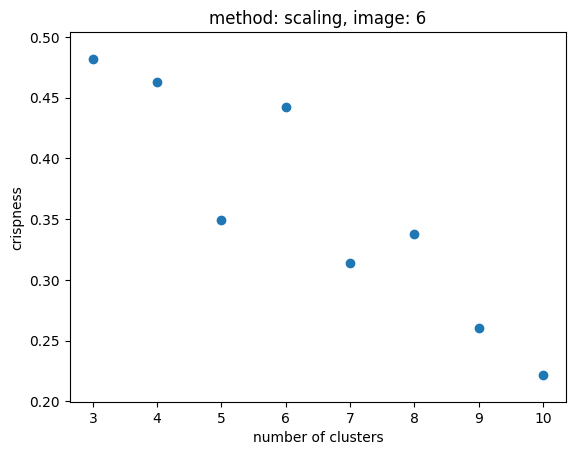

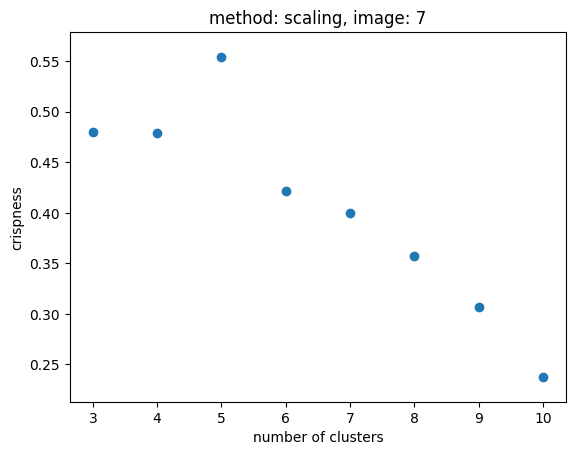

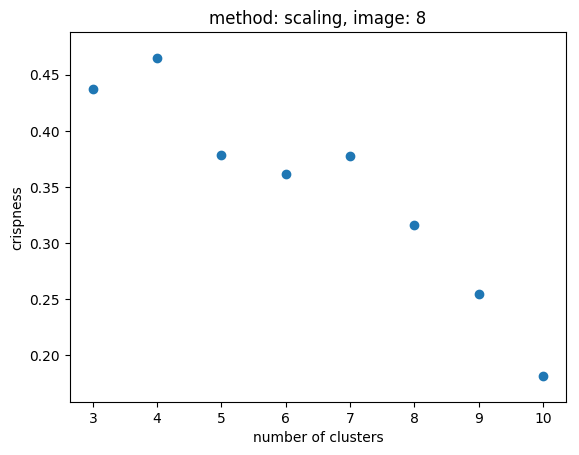

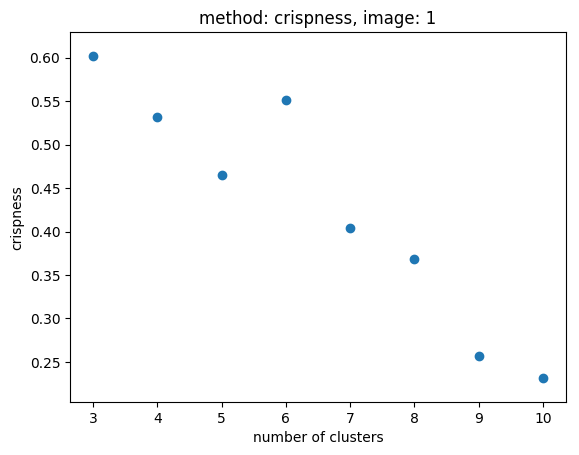

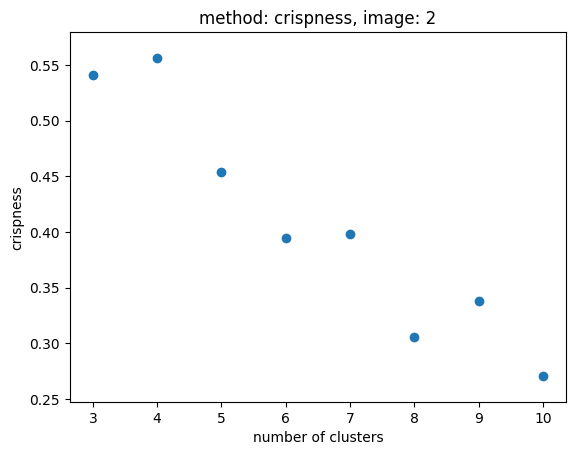

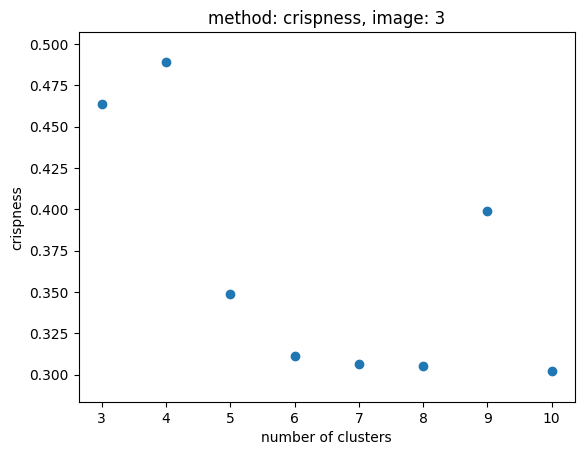

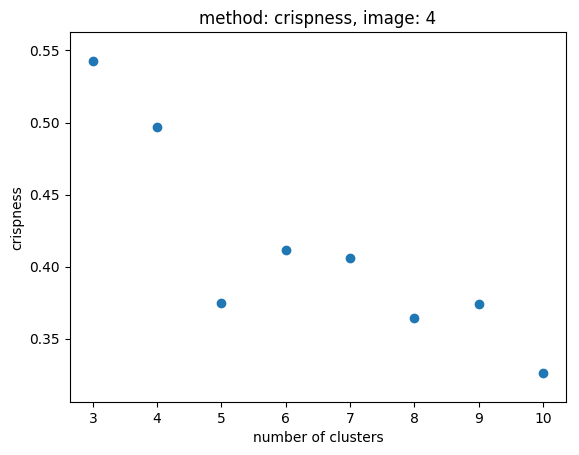

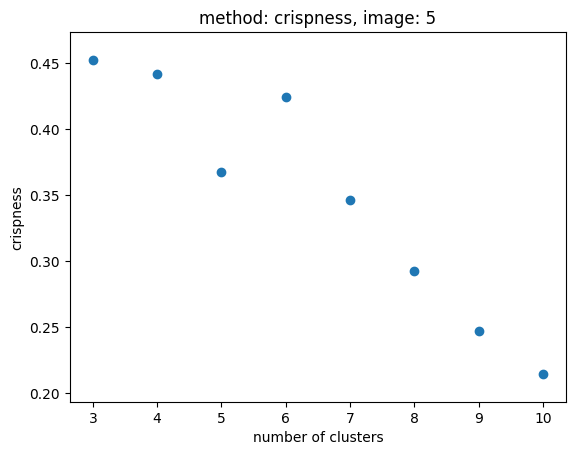

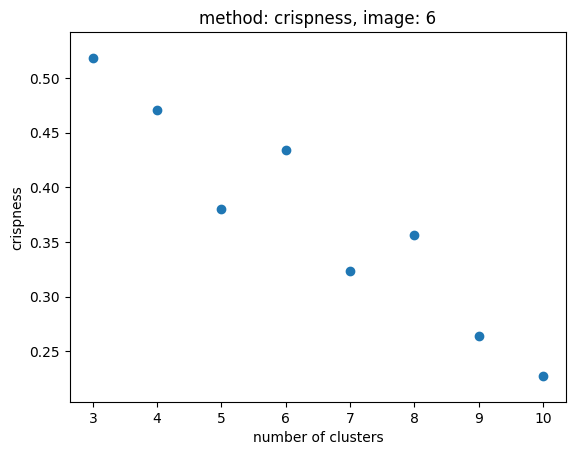

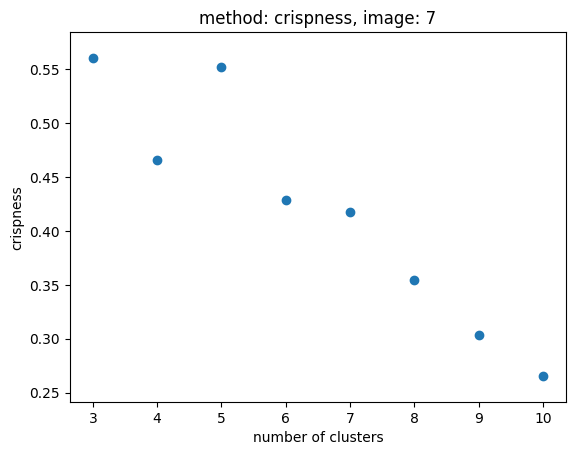

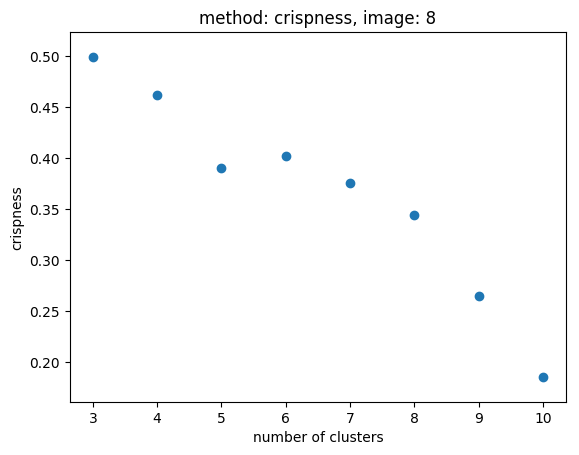

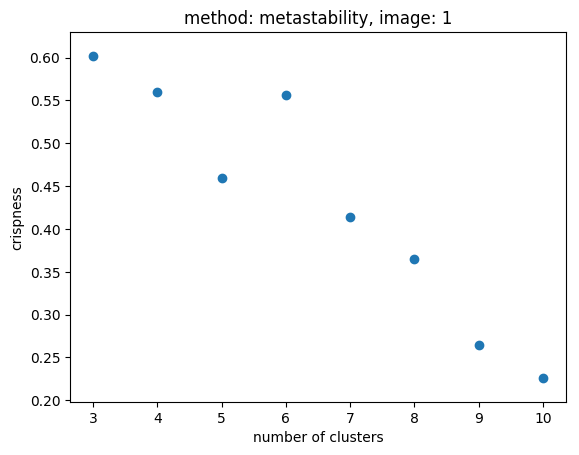

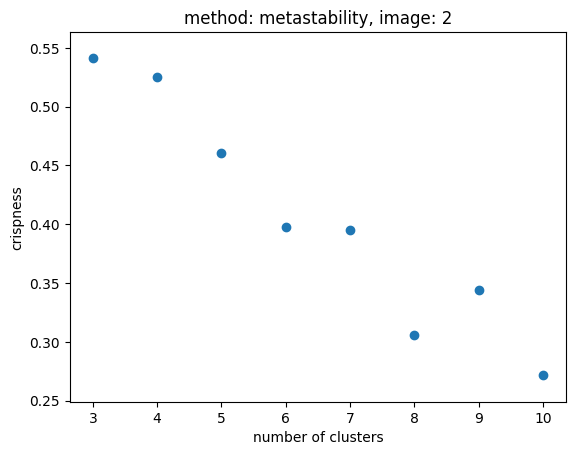

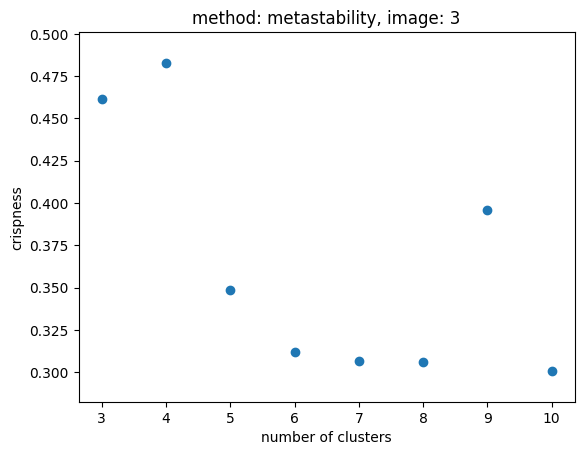

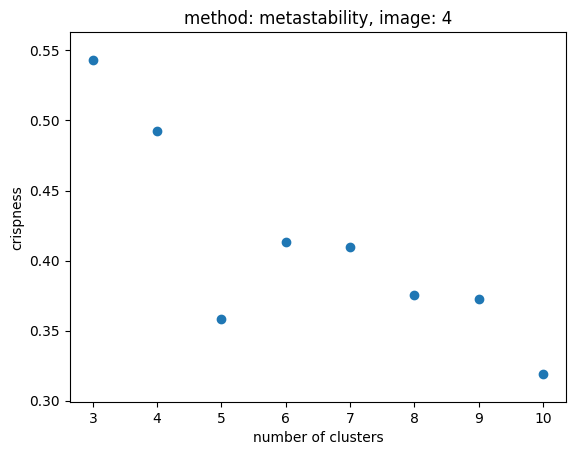

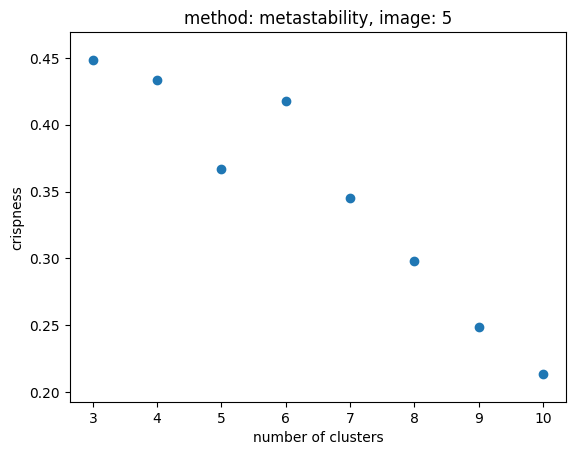

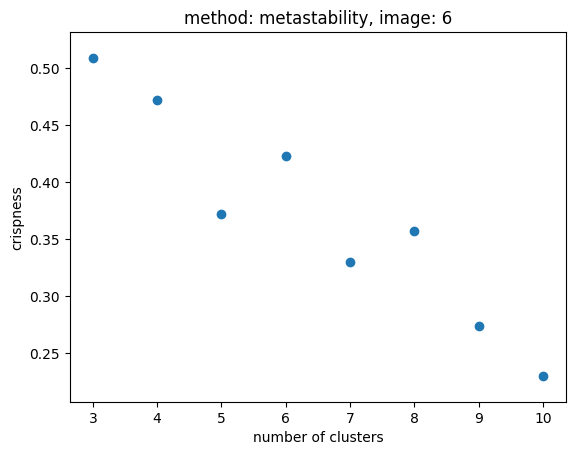

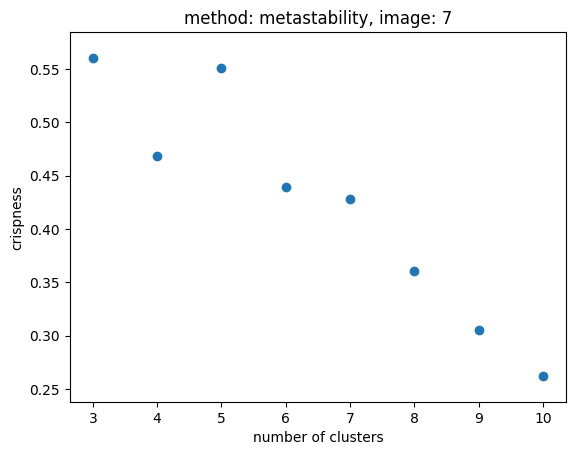

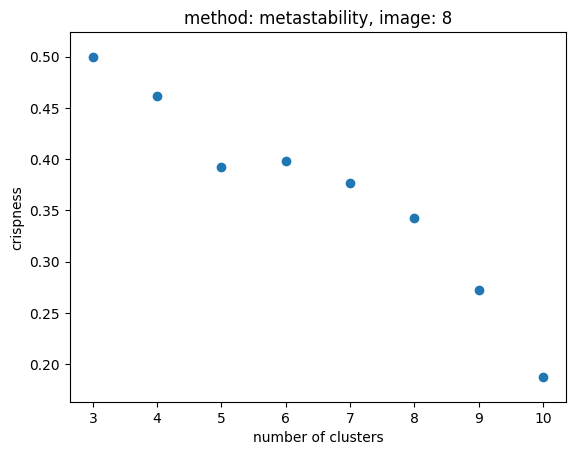

[10.0, 0.187999]
best number of clusters: 3.0


In [4]:
for method in [:scaling, :crispness, :metastability]
    println(method)
    for i in 1:8
        println("image ", i)
        otm = getNumberOfClusters(i, method)
        PyPlot.figure()
        PyPlot.scatter(otm[:,1], otm[:,2])
        PyPlot.xlabel("number of clusters")
        PyPlot.ylabel("crispness")
        PyPlot.title(string("method: ",method,", image: ",i))
        PyPlot.show()
        PyPlot.gcf()
        # "best" number of clusters
        n = otm[indmax(otm[:,2]),1]
        println("best number of clusters: ", n)
    end
end